In [29]:
import pandas as pd
import numpy as np
import scipy as sp 
import seaborn as sns
from fuzzywuzzy import process, fuzz
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_columns', None)
sns.set_theme()

In [2]:
animes = pd.read_csv('./anime_data_2006_2022_cleaned.csv')

In [3]:
animes = animes[animes['type'] == 'TV'].reset_index(drop=True)

In [4]:
animes[animes['title'].duplicated()]

,mal_id,url,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,year,season,producers,licensors,studios,genres,themes,demographics,image_url,trailer_url,aired_date,broadcast_day_and_time,start_date


In [5]:
animes[animes['title'].isnull()]

,mal_id,url,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,year,season,producers,licensors,studios,genres,themes,demographics,image_url,trailer_url,aired_date,broadcast_day_and_time,start_date


In [6]:
animes['f_col'] = animes['genres'] + ',' + animes['themes'] + ',' + animes['demographics']

In [7]:
normalizied_df = animes[['score', 'rank', 'popularity', 'scored_by', 'members', 'favorites']]

In [8]:
normalizied_df

,score,rank,popularity,scored_by,members,favorites
0,8.16,413.0,128,672279.0,1110503,34094
1,8.94,15.0,139,391827.0,1052162,58905
2,8.03,573.0,155,487522.0,993437,18516
3,7.83,888.0,179,475447.0,909771,15321
4,7.88,809.0,229,391899.0,797940,21247
...,...,...,...,...,...,...
5023,NaN,18727.0,23075,NaN,76,0
5024,NaN,13523.0,23028,NaN,76,0
5025,NaN,18117.0,26077,NaN,25,0
5026,NaN,18127.0,26078,NaN,25,0


In [9]:
normalizied_df = normalizied_df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [10]:
normalizied_df

,score,rank,popularity,scored_by,members,favorites
0,-0.272758,-0.272393,-0.272650,0.332622,0.727242,-0.242063
1,-0.238084,-0.238078,-0.237960,0.134313,0.761916,-0.182107
2,-0.251681,-0.251112,-0.251533,0.239058,0.748319,-0.233051
3,-0.256764,-0.255797,-0.256576,0.265833,0.743236,-0.239932
4,-0.253172,-0.252168,-0.252895,0.237961,0.746828,-0.226554
...,...,...,...,...,...,...
5023,NaN,0.357855,0.546284,NaN,-0.450423,-0.453716
5024,NaN,0.189606,0.602365,NaN,-0.394335,-0.397635
5025,NaN,0.270823,0.576073,NaN,-0.422969,-0.423927
5026,NaN,0.271091,0.575984,NaN,-0.423058,-0.424016


In [11]:
df = pd.merge(animes[['f_col']], normalizied_df, left_index=True, right_index=True)

In [12]:
df.fillna(0, inplace=True)

In [13]:
df.head()

,f_col,score,rank,popularity,scored_by,members,favorites
0,"Comedy,Romance,Crossdressing,Reverse Harem,Sch...",-0.272758,-0.272393,-0.272650,0.332622,0.727242,-0.242063
1,"Action,Comedy,Sci-Fi,Gag Humor,Historical,Paro...",-0.238084,-0.238078,-0.237960,0.134313,0.761916,-0.182107
2,"Action,Adult Cast,Organized Crime,Seinen",-0.251681,-0.251112,-0.251533,0.239058,0.748319,-0.233051
3,"Award Winning,Comedy,Mystery,Sci-Fi,School,Others",-0.256764,-0.255797,-0.256576,0.265833,0.743236,-0.239932
4,"Horror,Mystery,Supernatural,Gore,Psychological...",-0.253172,-0.252168,-0.252895,0.237961,0.746828,-0.226554


In [14]:
df = pd.concat([df.drop('f_col', axis=1), df['f_col'].str.get_dummies(sep=',')], axis=1)

In [15]:
df.head()

,score,rank,popularity,scored_by,members,favorites,Action,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,Combat Sports,Comedy,Crossdressing,Delinquents,Detective,Drama,Ecchi,Educational,Erotica,Fantasy,Gag Humor,Girls Love,Gore,Gourmet,Harem,High Stakes Game,Historical,Horror,Idols (Female),Idols (Male),Isekai,Iyashikei,Josei,Kids,Love Polygon,Magical Sex Shift,Mahou Shoujo,Martial Arts,Mecha,Medical,Military,Music,Mystery,Mythology,Organized Crime,Otaku Culture,Others,Parody,Performing Arts,Pets,Psychological,Racing,Reincarnation,Reverse Harem,Romance,Romantic Subtext,Samurai,School,Sci-Fi,Seinen,Shoujo,Shounen,Showbiz,Slice of Life,Space,Sports,Strategy Game,Super Power,Supernatural,Survival,Suspense,Team Sports,Time Travel,Vampire,Video Game,Visual Arts,Workplace
0,-0.272758,-0.272393,-0.272650,0.332622,0.727242,-0.242063,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.238084,-0.238078,-0.237960,0.134313,0.761916,-0.182107,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.251681,-0.251112,-0.251533,0.239058,0.748319,-0.233051,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.256764,-0.255797,-0.256576,0.265833,0.743236,-0.239932,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.253172,-0.252168,-0.252895,0.237961,0.746828,-0.226554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [17]:
def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [32]:
num_clusters = [i for i in range(2, 500)]

In [33]:
inertia = kmeans_inertia(num_clusters, df)
# inertia

Text(0, 0.5, 'Inertia')

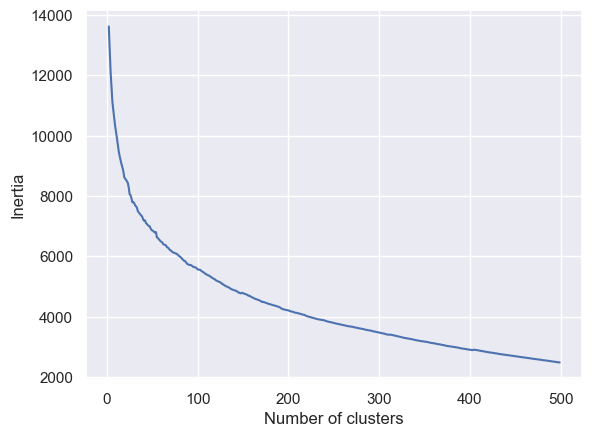

In [34]:
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Inertia")

In [35]:
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [36]:
sil_score = kmeans_sil(num_clusters, df)
# sil_score

Text(0, 0.5, 'Silhouette Score')

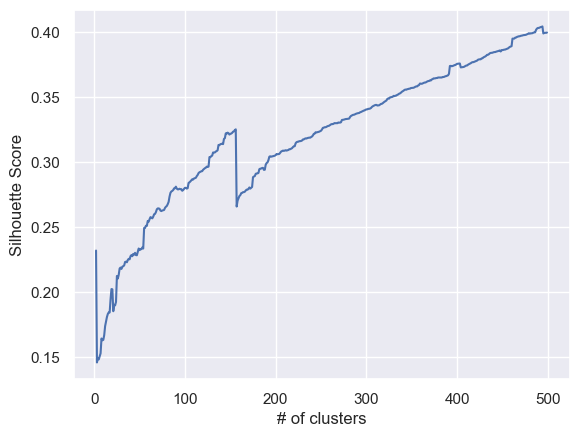

In [37]:
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters")
plot.set_ylabel("Silhouette Score")

In [40]:
import plotly.express as px

fig = px.line(x=num_clusters, y=sil_score)
# plot.set_xlabel("# of clusters")
# plot.set_ylabel("Silhouette Score")
fig.show()

In [41]:
kmeans494 = KMeans(n_clusters=494, random_state=42)
kmeans494.fit(df)

KMeans(n_clusters=494, random_state=42)

In [42]:
print(kmeans494.labels_[:5])

[177  53 107 454  57]


In [45]:
animes['cluster'] = kmeans494.labels_
animes.head()

,mal_id,url,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,year,season,producers,licensors,studios,genres,themes,demographics,image_url,trailer_url,aired_date,broadcast_day_and_time,start_date,f_col,cluster
0,853,https://myanimelist.net/anime/853/Ouran_Koukou...,Ouran High School Host Club,Ouran High School Host Club,桜蘭高校ホスト部,"Ohran Koko Host Club,Ouran Koukou Hosutobu,Our...",TV,Manga,26.0,Finished Airing,False,23 min per ep,PG-13 - Teens 13 or older,8.16,672279.0,413.0,128,1110503,34094,Haruhi Fujioka is a studious girl who has rece...,In addition to this anime and the source manga...,2006,Spring,"VAP,Hakusensha,Nippon Television Network",Funimation,Bones,"Comedy,Romance","Crossdressing,Reverse Harem,School",Shoujo,https://cdn.myanimelist.net/images/anime/2/719...,https://www.youtube.com/watch?v=NcC5VCE2Its,"Apr 5, 2006 to Sep 27, 2006",Wednesdays at 00:50 (JST),2006-04-05,"Comedy,Romance,Crossdressing,Reverse Harem,Sch...",177
1,918,https://myanimelist.net/anime/918/Gintama,Gintama,Gintama,銀魂,"Gin Tama,Silver Soul,Yorinuki Gintama-san",TV,Manga,201.0,Finished Airing,False,24 min per ep,PG-13 - Teens 13 or older,8.94,391827.0,15.0,139,1052162,58905,Edo is a city that was home to the vigor and a...,Several games based on Gintama have been relea...,2006,Spring,"TV Tokyo,Aniplex,Dentsu,Trinity Sound,Audio Hi...","Sentai Filmworks,Crunchyroll",Sunrise,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",Shounen,https://cdn.myanimelist.net/images/anime/10/73...,NaN,"Apr 4, 2006 to Mar 25, 2010",Thursdays at 18:00 (JST),2006-04-04,"Action,Comedy,Sci-Fi,Gag Humor,Historical,Paro...",53
2,889,https://myanimelist.net/anime/889/Black_Lagoon,Black Lagoon,Black Lagoon,BLACK LAGOON,NaN,TV,Manga,12.0,Finished Airing,False,23 min per ep,R - 17+ (violence & profanity),8.03,487522.0,573.0,155,993437,18516,Salaryman Rokurou Okajima spends his days tryi...,Black Lagoon was released on DVD by Geneon Ent...,2006,Spring,"Geneon Universal Entertainment,Shogakukan-Shue...","Funimation,Geneon Entertainment USA",Madhouse,Action,"Adult Cast,Organized Crime",Seinen,https://cdn.myanimelist.net/images/anime/1906/...,https://www.youtube.com/watch?v=d4EbGC7fKnQ,"Apr 9, 2006 to Jun 25, 2006",Sundays at 02:35 (JST),2006-04-09,"Action,Adult Cast,Organized Crime,Seinen",107
3,849,https://myanimelist.net/anime/849/Suzumiya_Har...,The Melancholy of Haruhi Suzumiya,The Melancholy of Haruhi Suzumiya,涼宮ハルヒの憂鬱,Suzumiya Haruhi no Yuuutsu,TV,Light novel,14.0,Finished Airing,False,23 min per ep,PG-13 - Teens 13 or older,7.83,475447.0,888.0,179,909771,15321,If a survey were conducted to see if people be...,Suzumiya Haruhi no Yuuutsu aired in a nonlinea...,2006,Spring,"Lantis,Kadokawa Shoten,Kadokawa Pictures Japan...","Funimation,Bandai Entertainment,Kadokawa Pictu...",Kyoto Animation,"Award Winning,Comedy,Mystery,Sci-Fi",School,Others,https://cdn.myanimelist.net/images/anime/1470/...,NaN,"Apr 3, 2006 to Jul 3, 2006",Mondays at 00:00 (JST),2006-04-03,"Award Winning,Comedy,Mystery,Sci-Fi,School,Others",454
4,934,https://myanimelist.net/anime/934/Higurashi_no...,Higurashi: When They Cry,Higurashi: When They Cry,ひぐらしのなく頃に,"When the Cicadas Cry,The Moment the Cicadas Cry",TV,Visual novel,26.0,Finished Airing,False,24 min per ep,R - 17+ (violence & profanity),7.88,391899.0,809.0,229,797940,21247,Keiichi Maebara has just moved to the quiet li...,Geneon Entertainment USA initially licensed an...,2006,Spring,"Geneon Universal Entertainment,Frontier Works,...","Sentai Filmworks,Geneon Entertainment USA",Studio Deen,"Horror,Mystery,Supernatural","Gore,Psychological",Others,https://cdn.myanimelist.net/images/anime/12/19...,NaN,"Apr 5, 2006 to Sep 27, 2006",Wednesdays at 01:30 (JST),2006-04-05,"Horror,Mystery,Supernatural,Gore,Psychological...",57


In [55]:
titles = animes[animes['type'] == 'TV']['title'].unique().tolist()

In [56]:
def recommend(anime_title):
    anime_title = process.extract(anime_title, titles, scorer=fuzz.token_set_ratio)[0][0]
    anime_cluster = animes[animes['title'] == anime_title]['cluster'].values[0]
    recommended_animes = animes[(animes['cluster'] == anime_cluster) & (animes['title'] != anime_title)]['title'].values
    return recommended_animes.tolist()

In [59]:
recommend('magi')

["Magician's Academy",
 'Kämpfer',
 'Aria the Scarlet Ammo',
 'A Dark Rabbit has Seven Lives',
 'Majikoi: Oh! Samurai Girls',
 'Blade Dance of the Elementalers',
 'The Asterisk War',
 'Absolute Duo',
 'The Asterisk War Season 2',
 'Hybrid x Heart Magias Academy Ataraxia',
 'Undefeated Bahamut Chronicle']